In [ ]:
# Milestone 3 Project: NBA Statistics for determining the MVP of a Season
# Task 1:  Machine Learning Question: Can we use machine learning to accurately predict who will be named the most valuable player in the NBA each season?
# My refined research question is By analyzing player performance over an entire NBA season, can we accurately predict who will be named MVP?
#  Task 2: My source of data for my models will be NBA Player Stats from 1991-2021, taken from Kaggle.
#  Task 3: I will be using a Ridge regression model as MVP data is often based on a wide range of parameters which are strongly correlated to our each other, which can lead to overfitting of the data. I will also be using a Random Forest Regression model. 
# Yes, my target variable is numerical.
# My data has 14,092 records in total with 33 features. I will need to do a fair amount of data cleaning and feature engineering as I will be combining three data csv files into one dataframe. I will need to filter out duplicate records, remove any errors or missing records, group certain features together to make it easier to call those variables, and merge all unique variables into one cohesive dataframe to be used to predict the MVP for each year.
# I will need to split the data into training and test sets.


In [ ]:
# Task 4
# Project Plan:
# At the end of a grueling NBA season, one player is crowned the best player in the league. This accolade is achieved by an examination of their overall statistics for the season and is decided by a voting process by a panel of broadcasters and sportswriters. However, to an average nba fan it is not clear what metrics are being used to decide the mvp of a season. They may know one player scores a lot or has a lot of assists, but they don’t know exactly what metrics are used to determine who the sportswriters and broadcasters choose to be the MVP. The question often arises, are these decisions arbitrary, based solely on the opinion of these sportswriters and broadcasters, or is their a set of measures that are consistently used to predict who the mvp will be?
# Our goal is to determine by using player performance for a given year, can we accurately predict who will be named MVP?
# The source of my data is a set of files scraped from the website Basketball Reference, which have been posted on the Data science website Kaggle.
# I chose this data set because it contains all the relevant statistics for the NBA, dating back to 1950. This information is provided by Sportrader, an official partner of the NBA lending authenticity to the data being provided. I didn’t encounter any issues loading the data, but I will need to do a fair bit of data cleaning and data wrangling to distill the data into a single usable format, as the data is broken up into several separate files. I will need to find variables in which I can merge these sheets together, prune out any N/A records, replace any incorrect records, and remove any unnecessary “noise” from the data.
# I will be using two models for my analysis. I will be using a Ridge regression model as MVP data is often based on a wide range of parameters which are strongly correlated to our each other, which can lead to overfitting of the data. Ridge regression works to shrink the linear regression coefficients to prevent this overfitting, to maintain accuracy and data integrity. I will also be using a Random Forest Regression model, which involves splitting the data into several different decision trees, and averaging them together to generate the most accurate model possible. We will consider a model to be successful at predicting the mvp of a given NBA season if it achieves a success rate of 70% or higher.
# My stakeholders are the NBA fans who are looking to understand the decision making process when it comes to who the MVP of the league will be. I will communicate my results by stating how accurate each model is, and which model offers the highest accuracy in determining who the next MVP will be in the NBA.


In [1]:
# Task 5: Data Wrangling
import pandas as pd


In [2]:
mvps = pd.read_csv('/Users/Alok/Downloads/NBA Player Stats1950_2022/mvps.csv', encoding = "latin-1", delimiter =";")

In [3]:
mvps

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6,476,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0,142,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,WAS,0,5,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,12,Ben Simmons,24,PHI,0,3,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,13T,James Harden,31,TOT,0,1,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13T,LeBron James,36,LAL,0,1,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [4]:
# Defining the dataframe mvps and the metrics we want to include in our model as we combine files
mvps = mvps[["Player","Year", "Pts Won", "Pts Max", "Share" ]]

In [5]:
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891,960,0.928
1,Magic Johnson,1991,497,960,0.518
2,David Robinson,1991,476,960,0.496
3,Charles Barkley,1991,222,960,0.231
4,Karl Malone,1991,142,960,0.148


In [6]:
players = pd.read_csv('/Users/Alok/Downloads/NBA Player Stats1950_2022/player.csv', encoding = "latin-1", delimiter =";")

In [7]:
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021
18040,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2,2.2,12.1,2021
18041,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [8]:
#removing unnecessary column Rk because this dataframe lists all players in the NBA, not where they ranked in the MVP voting
del players["Rk"]

In [9]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,0.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,0.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,0.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,0.394,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,0.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [10]:
# I will be merging the two datasets on the features Player and Year, which are shared variables between the dataframes, so that it will show the player and the year that they won their mvp and the relevant stats
players["Player"].head(50)

0         Alaa Abdelnaby
1     Mahmoud Abdul-Rauf
2             Mark Acres
3          Michael Adams
4           Mark Aguirre
5            Danny Ainge
6            Mark Alarie
7           Steve Alford
8          Greg Anderson
9          Greg Anderson
10         Greg Anderson
11         Greg Anderson
12         Nick Anderson
13          Ron Anderson
14       Willie Anderson
15        Michael Ansley
16        B.J. Armstrong
17         Vincent Askew
18          Keith Askins
19           Milo Babi?
20          Thurl Bailey
21           Cedric Ball
22         Ken Bannister
23      Charles Barkley*
24           Dana Barros
25           John Battle
26          Kenny Battle
27          Kenny Battle
28          Kenny Battle
29       William Bedford
30       Benoit Benjamin
31       Benoit Benjamin
32       Benoit Benjamin
33       Winston Bennett
34           Larry Bird*
35      Rolando Blackman
36          Lance Blanks
37       Mookie Blaylock
38         Muggsy Bogues
39            Manute Bol


In [11]:
#removing the asterisks that are next to certain player names in the list
players["Player"] = players["Player"].str.replace("*","", regex=False)

In [12]:
players.head(50)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,0.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,0.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,0.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,0.394,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,0.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,0.472,...,0.6,2,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,Mark Alarie,PF,27,WSB,42,1,14,2.4,5.4,0.44,...,1,1.8,2.8,1.1,0.4,0.2,1,2.1,5.8,1991
7,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,0.504,...,0.3,0.4,0.7,0.6,0.2,0,0.5,0.3,4.4,1991
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4,0.43,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1,2.8,0.37,...,1,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


In [13]:
#grouping two variables that will be pulled together multiple times throughout the project
players.groupby(["Player", "Year"])

In [14]:
#removing duplicate records of players, and identifying and labeling the total statistics for a players career 
def single_row(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

players = players.groupby(["Player","Year"]).apply(single_row)

In [15]:
players.head(20)

Player Pos Age   Tm   G  GS    MP   FG  \
Player          Year                                                         
?an Tabak       1995 2311        ?an Tabak   C  24  HOU  37   0   4.9  0.6   
                1996 2862        ?an Tabak   C  25  TOR  67  18  19.9  3.4   
                1997 3461        ?an Tabak   C  26  TOR  13   4  16.8  2.5   
                1998 4013        ?an Tabak   C  27  BOS  57  34  17.3  2.5   
                2000 5080        ?an Tabak   C  29  IND  18   0   6.3  0.9   
                2001 5642        ?an Tabak   C  30  IND  55  14  14.1  1.8   
?arko ?abarkapa 2004 6818  ?arko ?abarkapa  PF  22  PHO  49   4  11.6  1.7   
                2005 7422  ?arko ?abarkapa  PF  23  GSW  40   0  11.9  2.2   
                2006 8029  ?arko ?abarkapa  PF  24  GSW  61   0   8.3  1.1   
?eljko Rebra?a  2002 6095   ?eljko Rebra?a   C  29  DET  74   4  15.9  2.6   
                2003 6595   ?eljko Rebra?a   C  30  DET  30  12  16.3  2.7   
                2004 7176   ?eljko Rebra?a   C  31  ATL  24   2  11.4  1.4   
                2005 7776   ?eljko Rebra?a   C  32  LAC  58   2    16  2.3   
                2006 8370   ?eljko Rebra?a   C  33  LAC  29   2  14.2  1.8   
A.C. Green      1991 164        A.C. Green  PF  27  LAL  82  21  26.4  3.1   
                1992 633        A.C. Green  PF  28  LAL  82  53  35.4  4.7   
                1993 1092       A.C. Green  PF  29  LAL  82  55  34.4  4.6   
                1994 1579       A.C. Green  PF  30  PHO  82  55  34.5  5.7   
                1995 2067       A.C. Green  SF  31  PHO  82  52  32.8  3.8   
                1996 2563       A.C. Green  SF  32  PHO  82  36  25.8  2.6   

                            FGA    FG%  ...  ORB  DRB  TRB  AST  STL  BLK  \
Player          Year                    ...                                 
?an Tabak       1995 2311   1.4  0.453  ...  0.6  0.9  1.5  0.1  0.1  0.2   
                1996 2862   6.2  0.543  ...  1.7    3  4.8  0.9  0.4  0.5   
                1997 3461   5.5  0.451  ...  1.5  2.2  3.8  1.1  0.5  0.8   
                1998 4013   5.3  0.467  ...  1.5  2.2  3.7  0.8  0.4  0.7   
                2000 5080   1.9  0.471  ...  0.9  0.9  1.8  0.2  0.2  0.5   
                2001 5642   3.4  0.527  ...  1.2  2.7  3.9  0.6  0.2  0.5   
?arko ?abarkapa 2004 6818     4  0.411  ...  0.5  1.5    2  0.8  0.2  0.3   
                2005 7422   4.4  0.486  ...  0.9  1.7  2.6  0.6  0.3  0.1   
                2006 8029   2.9  0.385  ...  0.6  1.2  1.8  0.3  0.2  0.1   
?eljko Rebra?a  2002 6095   5.1  0.505  ...  1.1  2.8  3.9  0.5  0.4    1   
                2003 6595   4.8  0.552  ...  0.9  2.2  3.1  0.3  0.2  0.6   
                2004 7176   3.2  0.442  ...    1  1.5  2.4  0.3  0.2  0.5   
                2005 7776     4  0.568  ...  0.8  2.3  3.2  0.4  0.2  0.7   
                2006 8370   3.3  0.542  ...  0.4  1.8  2.2  0.3  0.2  0.7   
A.C. Green      1991 164    6.6  0.476  ...  2.5  3.8  6.3  0.9  0.7  0.3   
                1992 633    9.8  0.476  ...  3.7  5.6  9.3  1.4  1.1  0.4   
                1993 1092   8.6  0.537  ...  3.5  5.2  8.7  1.4  1.1  0.5   
                1994 1579  11.3  0.502  ...  3.4  5.8  9.2  1.7  0.9  0.5   
                1995 2067   7.5  0.504  ...  2.4  5.8  8.2  1.5  0.7  0.4   
                1996 2563   5.4  0.484  ...    2  4.7  6.8  0.9  0.5  0.3   

                           TOV   PF   PTS  Year  
Player          Year                             
?an Tabak       1995 2311  0.5    1     2  1995  
                1996 2862  1.5    3   7.7  1996  
                1997 3461  1.6  2.7   6.5  1997  
                1998 4013  1.1  2.9   5.4  1998  
                2000 5080  0.6  0.7   2.1  2000  
                2001 5642    1  2.3   3.9  2001  
?arko ?abarkapa 2004 6818  1.1  1.5   4.1  2004  
                2005 7422  0.8  1.5     6  2005  
                2006 8029  0.6  1.4   3.3  2006  
?eljko Rebra?a  2002 6095  1.1  2.6   6.9  2002  
                2003 659

In [16]:
#Dropping index columns to clean up the table
players.index = players.index.droplevel()

In [17]:
players.index = players.index.droplevel()

In [18]:
#Checking data to make sure there are no duplicate records, and that each record is unique
players[players["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,DEN,68,2,13.6,1.7,4,0.43,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
467,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,0.456,...,4.1,7.4,11.5,1,1.1,0.8,2.5,3.2,11.5,1992
1412,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,0.543,...,2.4,5,7.4,0.7,0.7,0.9,1.2,3,6.4,1994
1911,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2,0.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2,2.9,1995
2381,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1,0.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
2948,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,0.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3541,Greg Anderson,C,33,ATL,50,0,8,0.7,1.6,0.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


In [19]:
#Joining the two dataframes, players and mvp, into one dataframe using the common variables Player and Year
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [20]:
combined.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,...,0.1,0.1,0.2,0.5,1,2,1995,NaN,NaN,NaN
1,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,0.543,...,0.9,0.4,0.5,1.5,3,7.7,1996,NaN,NaN,NaN
2,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,0.451,...,1.1,0.5,0.8,1.6,2.7,6.5,1997,NaN,NaN,NaN
3,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,0.467,...,0.8,0.4,0.7,1.1,2.9,5.4,1998,NaN,NaN,NaN
4,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,0.471,...,0.2,0.2,0.5,0.6,0.7,2.1,2000,NaN,NaN,NaN


In [21]:
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
201,Al Jefferson,C,29,CHA,73,73,35,9.6,18.8,0.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
343,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,0.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
345,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22,0.412,...,4.6,2.3,0.1,3.5,2,26.8,1999,319.0,1180.0,0.270
346,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,0.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
347,Allen Iverson,SG,25,PHI,71,71,42,10.7,25.5,0.42,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13601,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,0.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13602,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,0.46,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13606,Vince Carter,SF-SG,28,NJN,77,76,36.7,9,20,0.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13966,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,0.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [22]:
#replacing the NaN values with 0 to prevent later errors)
combined[["Pts Won", "Pts Max","Share"]] = combined[["Pts Won", "Pts Max","Share"]].fillna(0)

In [23]:
combined[combined["Pts Won"] > 0 ]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
201,Al Jefferson,C,29,CHA,73,73,35,9.6,18.8,0.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
343,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,0.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
345,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22,0.412,...,4.6,2.3,0.1,3.5,2,26.8,1999,319.0,1180.0,0.270
346,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,0.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
347,Allen Iverson,SG,25,PHI,71,71,42,10.7,25.5,0.42,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13601,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,0.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13602,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,0.46,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13606,Vince Carter,SF-SG,28,NJN,77,76,36.7,9,20,0.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13966,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,0.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [24]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,...,0.1,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0
1,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,0.543,...,0.9,0.4,0.5,1.5,3,7.7,1996,0.0,0.0,0.0
2,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,0.451,...,1.1,0.5,0.8,1.6,2.7,6.5,1997,0.0,0.0,0.0
3,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,0.467,...,0.8,0.4,0.7,1.1,2.9,5.4,1998,0.0,0.0,0.0
4,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,0.471,...,0.2,0.2,0.5,0.6,0.7,2.1,2000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Ömer Aþýk,C,27,HOU,48,19,20.2,2.1,4,0.532,...,0.5,0.3,0.8,1.2,1.9,5.8,2014,0.0,0.0,0.0
14088,Ömer Aþýk,C,28,NOP,76,76,26.1,2.8,5.4,0.517,...,0.9,0.4,0.7,1.3,1.9,7.3,2015,0.0,0.0,0.0
14089,Ömer Aþýk,C,29,NOP,68,64,17.3,1.5,2.9,0.533,...,0.4,0.3,0.3,0.9,1.8,4,2016,0.0,0.0,0.0
14090,Ömer Aþýk,C,30,NOP,31,19,15.5,1,2.1,0.477,...,0.5,0.2,0.3,0.5,1.6,2.7,2017,0.0,0.0,0.0


In [25]:
teams = pd.read_csv('/Users/Alok/Downloads/NBA Player Stats1950_2022/teams.csv', encoding = "latin-1", delimiter =";")

In [26]:
teams

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
1028,42,30,0.583,,112.4,110.2,2.26,2021,Dallas Mavericks*
1029,38,34,0.528,4,113.3,112.3,1.07,2021,Memphis Grizzlies*
1030,33,39,0.458,9,111.1,112.8,-1.58,2021,San Antonio Spurs
1031,31,41,0.431,11,114.6,114.9,-0.2,2021,New Orleans Pelicans


In [27]:
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,0.293,32,101.8,107.8,-5.91,1991,Miami Heat
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,61,21,0.744,,110,101,8.57,1991,Chicago Bulls*
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,0.585,13,106.4,104,2.33,1991,Milwaukee Bucks*


In [28]:
#Removing the string Division from the table
teams = teams[~teams['W'].str.contains('Division')]

In [29]:
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,0.293,32,101.8,107.8,-5.91,1991,Miami Heat
7,61,21,0.744,,110,101,8.57,1991,Chicago Bulls*
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,0.585,13,106.4,104,2.33,1991,Milwaukee Bucks*
10,43,39,0.524,18,109.8,109,0.72,1991,Atlanta Hawks*


In [30]:
#Getting rid of the asterisks again in the table
teams["Team"] = teams["Team"].str.replace('*','', regex=False)

C:\Users\Alok\AppData\Local\Temp\ipykernel_11180\702748403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["Team"] = teams["Team"].str.replace('*','', regex=False)


In [31]:
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,0.293,32,101.8,107.8,-5.91,1991,Miami Heat
7,61,21,0.744,,110,101,8.57,1991,Chicago Bulls
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons
9,48,34,0.585,13,106.4,104,2.33,1991,Milwaukee Bucks
10,43,39,0.524,18,109.8,109,0.72,1991,Atlanta Hawks


In [32]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [33]:
combined["Tm"].unique()

array(['HOU', 'TOR', 'BOS', 'IND', 'PHO', 'GSW', 'DET', 'ATL', 'LAC',
       'LAL', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'WAS', 'MIN', 'DEN',
       'ORL', 'NOH', 'SAC', 'CHO', 'POR', 'PHI', 'UTA', 'MIL', 'VAN',
       'SEA', 'NJN', 'NOK', 'OKC', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

In [34]:
#Creating a Dictionary for Team names to replace the abbreviations with full names
nicknames = {}

with open('/Users/Alok/Downloads/NBA Player Stats1950_2022/nicknames.csv') as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace('\n','').split(';')
        nicknames[abbrev] = name

In [35]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [36]:
combined['Team'] = combined['Tm'].map(nicknames)

In [37]:
combined.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,...,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0,Houston Rockets
1,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,0.543,...,0.4,0.5,1.5,3,7.7,1996,0.0,0.0,0.0,Toronto Raptors
2,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,0.451,...,0.5,0.8,1.6,2.7,6.5,1997,0.0,0.0,0.0,Toronto Raptors
3,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,0.467,...,0.4,0.7,1.1,2.9,5.4,1998,0.0,0.0,0.0,Boston Celtics
4,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,0.471,...,0.2,0.5,0.6,0.7,2.1,2000,0.0,0.0,0.0,Indiana Pacers


In [38]:
#Merging the teams data with the combined player and mvp data from before
stats = combined.merge(teams, how="outer", on=["Team","Year"])

In [39]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,...,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
1,Adrian Caldwell,PF,28,HOU,7,0,4.3,0.1,0.6,0.25,...,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
2,Carl Herrera,PF,28,HOU,61,26,21.8,2.8,5.4,0.523,...,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
3,Charles Jones,PF,37,HOU,3,0,12,0.3,1,0.333,...,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
4,Chucky Brown,SF,26,HOU,41,14,19.9,2.6,4.2,0.603,...,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.47,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45


In [40]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,...,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0,Houston Rockets
1,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,0.543,...,0.4,0.5,1.5,3,7.7,1996,0.0,0.0,0.0,Toronto Raptors
2,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,0.451,...,0.5,0.8,1.6,2.7,6.5,1997,0.0,0.0,0.0,Toronto Raptors
3,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,0.467,...,0.4,0.7,1.1,2.9,5.4,1998,0.0,0.0,0.0,Boston Celtics
4,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,0.471,...,0.2,0.5,0.6,0.7,2.1,2000,0.0,0.0,0.0,Indiana Pacers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Ömer Aþýk,C,27,HOU,48,19,20.2,2.1,4,0.532,...,0.3,0.8,1.2,1.9,5.8,2014,0.0,0.0,0.0,Houston Rockets
14088,Ömer Aþýk,C,28,NOP,76,76,26.1,2.8,5.4,0.517,...,0.4,0.7,1.3,1.9,7.3,2015,0.0,0.0,0.0,New Orleans Pelicans
14089,Ömer Aþýk,C,29,NOP,68,64,17.3,1.5,2.9,0.533,...,0.3,0.3,0.9,1.8,4,2016,0.0,0.0,0.0,New Orleans Pelicans
14090,Ömer Aþýk,C,30,NOP,31,19,15.5,1,2.1,0.477,...,0.2,0.3,0.5,1.6,2.7,2017,0.0,0.0,0.0,New Orleans Pelicans


In [41]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [42]:
#converting datatypes to their correct types as numeric
stats = stats.apply(pd.to_numeric, errors ="ignore")

In [43]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [44]:
stats["GB"].unique()

array(['15', '51', '39', '19', '\x97', '11', '27', '28', '20', '33', '25',
       '7', '5', '14', '23', '40', '42', '18', '6', '24', '26', '37',
       '29', '21', '8', '1', '13', '17', '3', '9', '2', '35', '16', '41',
       '12', '50', '10', '30', '34', '4', '1.5', '22', '36', '43', '18.5',
       '48', '46', '10.5', '32', '38', '31', '21.5', '45', '22.5', '25.5',
       '3.5', '20.5', '11.5', '44', '52', '56', '2.5', '12.5', '47',
       '32.5', '4.5'], dtype=object)

In [45]:
#cleaning the GB (games back) variable so that it can be a numeric type
stats["GB"] = stats["GB"].str.replace("\x97","0")

In [46]:
stats["GB"].unique()

array(['15', '51', '39', '19', '0', '11', '27', '28', '20', '33', '25',
       '7', '5', '14', '23', '40', '42', '18', '6', '24', '26', '37',
       '29', '21', '8', '1', '13', '17', '3', '9', '2', '35', '16', '41',
       '12', '50', '10', '30', '34', '4', '1.5', '22', '36', '43', '18.5',
       '48', '46', '10.5', '32', '38', '31', '21.5', '45', '22.5', '25.5',
       '3.5', '20.5', '11.5', '44', '52', '56', '2.5', '12.5', '47',
       '32.5', '4.5'], dtype=object)

In [47]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [48]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [49]:
stats.to_csv("player_mvp_stats_total.csv")

In [50]:
#Visualizing the Data to see key characteristics of the data
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending=False).head(10)

<AxesSubplot:xlabel='Player'>

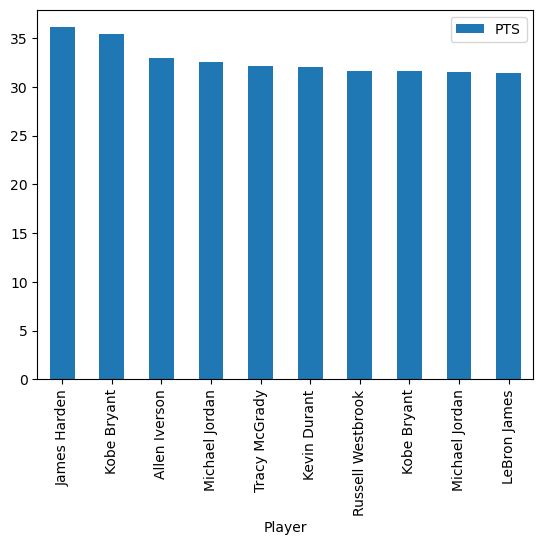

In [51]:
highest_scoring.plot.bar("Player", "PTS")

In [52]:
#Finding the highest scoring by year
highest_scoring = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

In [53]:
#def highest_pts(df):
    # return x.sort_values("PTS", ascending=False).head(1)

<AxesSubplot:xlabel='Year'>

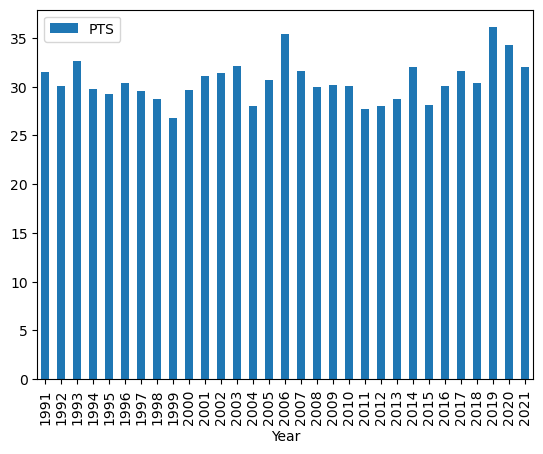

In [54]:
highest_scoring.plot.bar("Year", "PTS")

In [55]:
#Identifying the correlations with out key metric "Share"(which number of votes received/total number of votes cast)
stats.corr()["Share"]

Age        0.018596
G          0.089282
GS         0.167476
MP         0.162175
FG         0.276365
FGA        0.249254
FG%        0.064901
3P         0.096225
3PA        0.096460
3P%        0.030621
2P         0.275976
2PA        0.251885
2P%        0.061986
eFG%       0.058549
FT         0.316392
FTA        0.321457
FT%        0.040052
ORB        0.101375
DRB        0.213241
TRB        0.186209
AST        0.200253
STL        0.175041
BLK        0.154713
TOV        0.233015
PF         0.071046
PTS        0.288267
Year      -0.008135
Pts Won    0.995153
Pts Max    0.521335
Share      1.000000
W          0.122718
L         -0.121866
W/L%       0.126559
GB        -0.101014
PS/G       0.045206
PA/G      -0.039617
SRS        0.122782
Name: Share, dtype: float64

<AxesSubplot:>

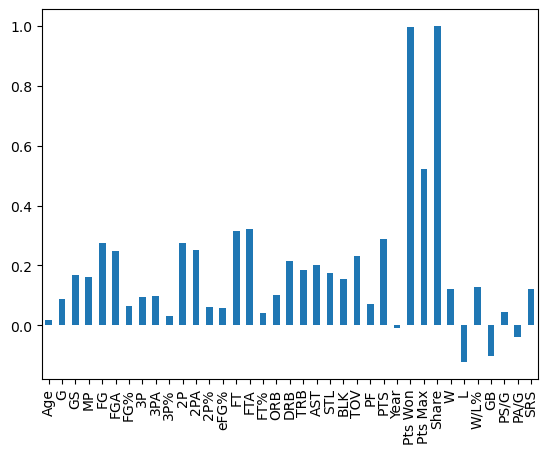

In [56]:
stats.corr()["Share"].plot.bar()

In [57]:
stats = pd.read_csv("/Users/Alok/Downloads/player_mvp_stats_total.csv", encoding="latin-1", delimiter=",")

In [58]:
stats

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,...,0.0,0.0,Houston Rockets,47,35,0.573,15.0,103.5,101.4,2.32
1,1,Adrian Caldwell,PF,28,HOU,7,0,4.3,0.1,0.6,...,0.0,0.0,Houston Rockets,47,35,0.573,15.0,103.5,101.4,2.32
2,2,Carl Herrera,PF,28,HOU,61,26,21.8,2.8,5.4,...,0.0,0.0,Houston Rockets,47,35,0.573,15.0,103.5,101.4,2.32
3,3,Charles Jones,PF,37,HOU,3,0,12.0,0.3,1.0,...,0.0,0.0,Houston Rockets,47,35,0.573,15.0,103.5,101.4,2.32
4,4,Chucky Brown,SF,26,HOU,41,14,19.9,2.6,4.2,...,0.0,0.0,Houston Rockets,47,35,0.573,15.0,103.5,101.4,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [59]:
del stats["Unnamed: 0"]

In [60]:
pd.isnull(stats).sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

In [61]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [62]:
# Task 6: Modeling
#assigning what variables will be considered predictors for our model

predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

In [63]:
# The model will be trained on all mvp data prior to 2021
train = stats[stats["Year"] < 2021]

In [64]:
# The model will be tested on the mvp data for 2021
test = stats[stats["Year"] == 2021]

In [65]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha =.1)

In [66]:
#training the model on using Ridge regression with the predictors above to determine the Share of votes they received
reg.fit(train[predictors], train["Share"])

Ridge(alpha=0.1)

In [67]:
predictions = reg.predict(test[predictors])

In [68]:
predictions = pd.DataFrame(predictions, columns = ["Predictions"], index=test.index)

In [69]:
predictions

,Predictions
841,0.013567
842,-0.013756
843,0.002414
844,-0.004421
845,0.010734
...,...
13897,-0.012571
13898,-0.011575
13899,0.016424
13900,-0.020434


In [70]:
#Matching predictions to the Players  and their share of mvp votes
combination = pd.concat([test[["Player", "Share"]], predictions], axis =1)

In [71]:
combination

,Player,Share,Predictions
841,Aaron Gordon,0.0,0.013567
842,Austin Rivers,0.0,-0.013756
843,Bol Bol,0.0,0.002414
844,Facundo Campazzo,0.0,-0.004421
845,Greg Whittington,0.0,0.010734
...,...,...,...
13897,Patty Mills,0.0,-0.012571
13898,Quinndary Weatherspoon,0.0,-0.011575
13899,Rudy Gay,0.0,0.016424
13900,Tre Jones,0.0,-0.020434


In [72]:
#Viewing by Highest vote share received for MVP
combination.sort_values("Share", ascending=False).head(10)

,Player,Share,Predictions
852,Nikola Joki?,0.961,0.154307
8691,Joel Embiid,0.580,0.162713
3760,Stephen Curry,0.449,0.142386
9974,Giannis Antetokounmpo,0.345,0.207436
1585,Chris Paul,0.138,0.072294
11014,Luka Don?i?,0.042,0.151430
7547,Damian Lillard,0.038,0.116303
3645,Julius Randle,0.020,0.088878
3640,Derrick Rose,0.010,0.033000
11358,Rudy Gobert,0.008,0.095349


In [73]:
# Task 7: Evaluation
#generating an error metric to evaluate the model
from sklearn.metrics import mean_squared_error

mean_squared_error(combination["Share"], combination["Predictions"])

0.002666895456710404

In [74]:
combination["Share"].value_counts()

0.000    525
0.001      3
0.961      1
0.138      1
0.010      1
0.020      1
0.449      1
0.005      1
0.038      1
0.003      1
0.580      1
0.345      1
0.042      1
0.008      1
Name: Share, dtype: int64

In [75]:
#Assigning ranks to the list of players in the mvp voting
combination = combination.sort_values("Share", ascending=False)
combination["Rk"] = list(range(1,combination.shape[0]+1))

In [76]:
combination.head(10)

,Player,Share,Predictions,Rk
852,Nikola Joki?,0.961,0.154307,1
8691,Joel Embiid,0.580,0.162713,2
3760,Stephen Curry,0.449,0.142386,3
9974,Giannis Antetokounmpo,0.345,0.207436,4
1585,Chris Paul,0.138,0.072294,5
11014,Luka Don?i?,0.042,0.151430,6
7547,Damian Lillard,0.038,0.116303,7
3645,Julius Randle,0.020,0.088878,8
3640,Derrick Rose,0.010,0.033000,9
11358,Rudy Gobert,0.008,0.095349,10


In [77]:
#Where each player was predicted to be ranked in the mvp voting
combination = combination.sort_values("Predictions", ascending=False)
combination["Predicted_Rk"] = list(range(1,combination.shape[0]+1))

In [78]:
combination.head(10)

,Player,Share,Predictions,Rk,Predicted_Rk
9974,Giannis Antetokounmpo,0.345,0.207436,4,1
8691,Joel Embiid,0.580,0.162713,2,2
852,Nikola Joki?,0.961,0.154307,1,3
11014,Luka Don?i?,0.042,0.151430,6,4
3845,LeBron James,0.001,0.147511,15,5
3760,Stephen Curry,0.449,0.142386,3,6
4286,Kevin Durant,0.000,0.141350,531,7
4283,James Harden,0.001,0.140598,13,8
11784,Zion Williamson,0.000,0.127926,251,9
3985,Russell Westbrook,0.005,0.120228,11,10


In [79]:
combination.sort_values("Share", ascending=False).head(10)

,Player,Share,Predictions,Rk,Predicted_Rk
852,Nikola Joki?,0.961,0.154307,1,3
8691,Joel Embiid,0.580,0.162713,2,2
3760,Stephen Curry,0.449,0.142386,3,6
9974,Giannis Antetokounmpo,0.345,0.207436,4,1
1585,Chris Paul,0.138,0.072294,5,33
11014,Luka Don?i?,0.042,0.151430,6,4
7547,Damian Lillard,0.038,0.116303,7,12
3645,Julius Randle,0.020,0.088878,8,24
3640,Derrick Rose,0.010,0.033000,9,76
11358,Rudy Gobert,0.008,0.095349,10,19


In [80]:
#Determining the models accuracy at predicting the top 5 candidates for each year
#found = how many mvps in the top 5 we found
#seen = how many records did we see before finding that mvp
#ap = average precision
def find_ap(combination):
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("Predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found +=1
            ps.append(found/seen)
        seen +=1
    return sum(ps) / len(ps)

In [81]:
find_ap(combination)

0.7636363636363636

In [82]:
years = list(range(1991,2022))

In [83]:
# creating a loop to help test for other years to achieve a higher confidence in the model accuracy
aps = []
all_predictions = []
for year in years[5:]:
    train = stats[stats["Year"] <year]
    test = stats[stats["Year"] ==year]
    reg.fit(train[predictors], train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns = ["Predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis =1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [84]:
mean_ap = sum(aps) / len(aps)

In [106]:
sum(aps) / len(aps)

0.7208380973034985

In [85]:
#adding in the difference between predicted rk and rk to see how large the deviation was between what was expected and what actually happened
def add_ranks(combination):
    combination = combination.sort_values("Share", ascending=False)
    combination["Rk"] = list(range(1,combination.shape[0]+1))
    combination = combination.sort_values("Predictions", ascending=False)
    combination["Predicted_Rk"] = list(range(1,combination.shape[0]+1))
    combination["Diff"] = combination["Rk"] - combination["Predicted_Rk"]
    return combination

In [86]:
ranking = add_ranks(all_predictions[1])
ranking[ranking["Rk"] <= 5].sort_values("Diff", ascending=False)

,Player,Share,Predictions,Rk,Predicted_Rk,Diff
1782,Karl Malone,0.857,0.192318,1,2,-1
10541,Michael Jordan,0.832,0.167629,2,3,-1
1119,Grant Hill,0.327,0.128646,3,6,-3
4791,Tim Hardaway,0.207,0.059984,4,20,-16
8315,Glen Rice,0.117,0.033110,5,53,-48


In [87]:
#a backtesting function to make it easier to run the code above without having to retype all of it out
def backtest(stats, model, year, predictors):
    aps = []
    all_predictions = []
    for year in years[5:]:
        train = stats[stats["Year"] <year]
        test = stats[stats["Year"] ==year]
        model.fit(train[predictors], train["Share"])
        predictions = reg.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns = ["Predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis =1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps)/len(aps), aps, pd.concat(all_predictions)

In [88]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [107]:
mean_ap

0.7208380973034985

In [90]:
all_predictions[all_predictions["Rk"] <= 5].sort_values("Diff").head(10)

,Player,Share,Predictions,Rk,Predicted_Rk,Diff
1420,Jason Kidd,0.712,0.028209,2,52,-50
8315,Glen Rice,0.117,0.033110,5,53,-48
5272,Steve Nash,0.839,0.034100,1,45,-44
8583,Peja Stojakovi?,0.228,0.036269,4,38,-34
5290,Steve Nash,0.739,0.054128,1,34,-33
12726,Joakim Noah,0.258,0.046968,4,37,-33
3766,Chauncey Billups,0.344,0.052698,5,35,-30
1585,Chris Paul,0.138,0.072294,5,33,-28
5305,Steve Nash,0.785,0.074421,2,21,-19
4791,Tim Hardaway,0.207,0.059984,4,20,-16


In [91]:
#breaks down what is the most important variable to the regression
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis =1).sort_values(0, ascending = False)

,0,1
13,0.070002,eFG%
18,0.035041,DRB
29,0.027126,W/L%
17,0.021610,ORB
10,0.016945,2P
21,0.011635,STL
15,0.011351,FTA
22,0.011234,BLK
20,0.007456,AST
25,0.005893,PTS


In [92]:
#Comparing a players stats to the average of that year across all players
stat_ratios = stats[["PTS", "AST", "STL", "BLK","3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())

In [93]:
stat_ratios

,PTS,AST,STL,BLK,3P,Year
0,0.235554,0.050537,0.141658,0.465785,0.000000,1.0
1,0.082444,0.000000,0.141658,0.000000,0.000000,1.0
2,0.800884,0.353756,0.991605,1.397355,0.000000,1.0
3,0.117777,0.000000,0.000000,0.698677,0.000000,1.0
4,0.718440,0.353756,0.424974,0.698677,0.000000,1.0
...,...,...,...,...,...,...
14087,0.735752,0.819562,0.479763,1.528302,0.650951,1.0
14088,0.071202,0.000000,0.000000,0.000000,0.130190,1.0
14089,1.281633,0.601012,1.119447,2.547170,0.520761,1.0
14090,0.474679,0.218550,0.319842,1.273585,0.650951,1.0


In [94]:
stats[["PTS_T", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK","3P"]]

In [95]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W/L%,GB,PS/G,PA/G,SRS,PTS_T,AST_R,STL_R,BLK_R,3P_R
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,...,0.573,15.0,103.5,101.4,2.32,0.235554,0.050537,0.141658,0.465785,0.0
1,Adrian Caldwell,PF,28,HOU,7,0,4.3,0.1,0.6,0.250,...,0.573,15.0,103.5,101.4,2.32,0.082444,0.000000,0.141658,0.000000,0.0
2,Carl Herrera,PF,28,HOU,61,26,21.8,2.8,5.4,0.523,...,0.573,15.0,103.5,101.4,2.32,0.800884,0.353756,0.991605,1.397355,0.0
3,Charles Jones,PF,37,HOU,3,0,12.0,0.3,1.0,0.333,...,0.573,15.0,103.5,101.4,2.32,0.117777,0.000000,0.000000,0.698677,0.0
4,Chucky Brown,SF,26,HOU,41,14,19.9,2.6,4.2,0.603,...,0.573,15.0,103.5,101.4,2.32,0.718440,0.353756,0.424974,0.698677,0.0


In [96]:
predictors += ["PTS_T", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [97]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [98]:
mean_ap

0.7208380973034985

In [99]:
stats["NPos"] = stats["Pos"].astype("category").cat.codes

In [100]:
stats["NTm"] = stats["Tm"].astype("category").cat.codes

In [101]:
stats["Pos"].unique()

array(['C', 'PF', 'SF', 'SG', 'PG', 'C-PF', 'PG-SG', 'PF-SF', 'SG-PG',
       'PF-C', 'SG-SF', 'SF-PF', 'SF-SG', 'SG-PF', 'PG-SF', 'SF-C'],
      dtype=object)

In [102]:
#create a series of decisions trees and average those decisions together
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators =100, random_state=1, min_samples_split=5)
mean_ap, aps, all_predictions = backtest(stats, rf, years[29:], predictors)

In [103]:
#Random Forest Regression
mean_ap

0.7456311092998757

In [104]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[29:], predictors)

In [105]:
#Ridge Regression
mean_ap

0.7208380973034985

In [109]:
# Task 8 Results:
# Based on the results of the Ridge regression model and the Random Forest Regression Model,
# we can confirm that the mvp voting process by sportswriters and broadcasters is rooted based on
# the actual player statistics, and also the award itself is weighted toward individual performance
# over team performance